Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

#HW 15-16

In [ ]:
cd "/content/drive/My Drive/Colab Notebooks/AI_Insight/HW15-16"

/content/drive/My Drive/Colab Notebooks/AI_Insight/HW15-16


## 1) Download các dataset cần thiết

Cats-Dogs dataset – Small version
https://drive.google.com/file/d/1U6WD6V563igKFUedzVT_hCvFeY2-tFE_/view?usp=sharing

Cats-Dogs dataset – Full version
https://drive.google.com/file/d/1__wtFSIFeX6RnIplg2odclb0ZpzCmzX/view?usp=sharing

Flower dataset
https://drive.google.com/file/d/11Buzytn4vIh4x_Oqz8MY29JMMdIqSzj-/view?usp=sharing

In [ ]:
!gdown --id 1U6WD6V563igKFUedzVT_hCvFeY2-tFE_

Downloading...
From: https://drive.google.com/uc?id=1U6WD6V563igKFUedzVT_hCvFeY2-tFE_
To: /content/drive/My Drive/Colab Notebooks/AI_Insight/HW15-16/cats_and_dogs_small.zip
68.5MB [00:00, 95.8MB/s]


In [ ]:
!unzip cats_and_dog_large.zip

In [ ]:
!gdown --id 1__wtFSIFeX6RnIp-lg2odclb0ZpzCmzX

Downloading...
From: https://drive.google.com/uc?id=1__wtFSIFeX6RnIp-lg2odclb0ZpzCmzX
To: /content/drive/My Drive/Colab Notebooks/AI_Insight/HW15-16/cats_and_dog_large.zip
572MB [00:04, 126MB/s]


In [ ]:
!unzip -q cats_and_dogs_small.zip

In [ ]:
!gdown --id 11Buzytn4vIh4x_Oqz8MY29JMMdIqSzj-

Downloading...
From: https://drive.google.com/uc?id=11Buzytn4vIh4x_Oqz8MY29JMMdIqSzj-
To: /content/drive/My Drive/Colab Notebooks/AI_Insight/HW15-16/flower_photos.zip
230MB [00:02, 87.5MB/s]


In [ ]:
!unzip flower_photos.zip

## 2) Đọc hiểu code từ các file sau để hiểu về cách thao tác data và network
## 1.Dataset.ipynb
## 2.DataProcessingLayer.ipynb
## 3.NetworkManipulation.ipynb
## 4.NetworkManipulation.ipynb

In [ ]:
ls

cats_and_dog_large/     cats_and_dogs_small/     flower_photos/
cats_and_dog_large.zip  cats_and_dogs_small.zip  flower_photos.zip


### **1.Dataset.ipynb**

Tensorflow hỗ trợ hàm **image_dataset_from_directory** để load data form directory và lấy class name **(class_name)** dựa trên name của parent directory của các ảnh.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image_dataset_from_directory

print(tf.__version__)
print(keras.__version__)

# training data
train_dataset = image_dataset_from_directory('cats_and_dogs_small/train',
                                             shuffle=True,
                                             batch_size=512,
                                             image_size=(160, 160))

# validation data
validation_dataset = image_dataset_from_directory('cats_and_dogs_small/validation',
                                                  shuffle=True,
                                                  batch_size=512,
                                                  image_size=(160, 160))

print(train_dataset.class_names)
print(validation_dataset.class_names)

2.4.1
2.4.0
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
['cats', 'dogs']
['cats', 'dogs']


có 2 cách để access data sau khi dùng **image_dataset_from_directory**, nếu dùng **.take(count)** trong đó count là số lượng samples muốn lấy ra, nếu không dùng thì sẽ lấy toàn bộ smaples.

In [ ]:
print(' ################## 1 #################')
for images, labels in train_dataset:
    print(images.shape)
    print(labels.shape)
    break

print('\n ################### 2 #################')
for images, labels in train_dataset.take(1):
    print(images.shape)
    print(labels.shape)

 ################## 1 #################
(512, 160, 160, 3)
(512,)

 ################### 2 #################
(512, 160, 160, 3)
(512,)


Vì dataset được load theo batch với size là 512 ảnh, và ví dụ dưới đây sẽ show 16 ảnh đầu teen

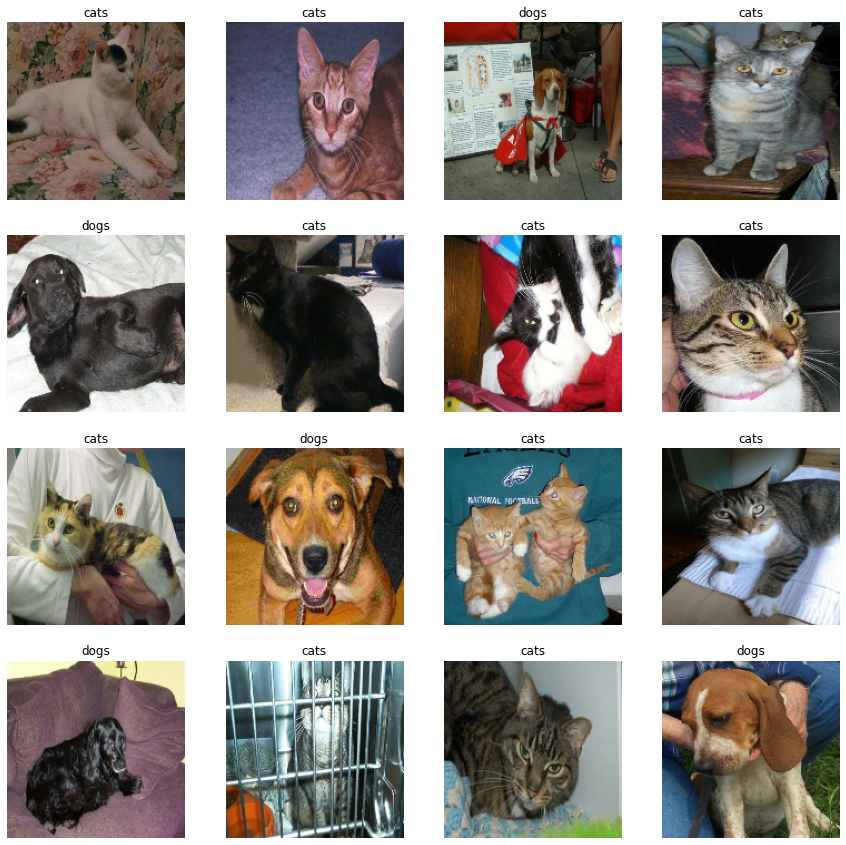

In [ ]:
class_names = train_dataset.class_names  

plt.figure(figsize=(15,15))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax =plt.subplot(4,4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

### **2.DataProcessingLayer.ipynb**


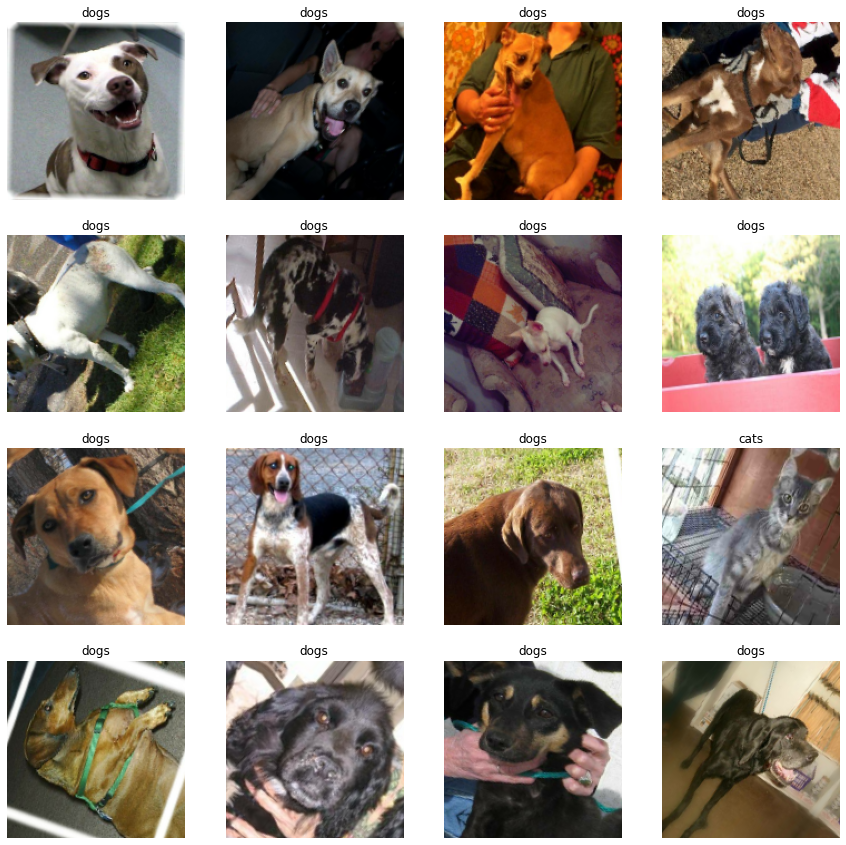

In [ ]:
data_augmentation = tf.keras.Sequential([
                                         tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                         tf.keras.layers.experimental.preprocessing.Rescaling(1./255., offset=0.),
                                         ])
plt.figure(figsize=(15,15))
for images, labels in train_dataset.take(1):
  for i in range(16):
    augmented_image = data_augmentation(images[i:i+1])
    ax = plt.subplot(4,4, i+1)
    plt.imshow(augmented_image[0])
    plt.title(class_names[labels[i]])
    plt.axis('off')

### **3.NetworkManipulation.ipynb**

Để truy cập thông tin của từng layer trong model ta dùng **.layers** để trả về  list các layer và trong từng layer **.name**, **.trainable** để lấy tên và thông tin layer đó có tham gia vào quá trình train hay không 

In [ ]:
# LeNet-like
import tensorflow as tf

# model architecture
model = tf.keras.Sequential()
# input shape (28,28,1)
model.add(tf.keras.Input(shape=(28, 28, 1)))

# convolution 1
model.add(tf.keras.layers.Conv2D(6, (3,3), padding='same', activation='relu')) 
# max pooling 1
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# convolution 2
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))
# max pooling 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Flatten
model.add(tf.keras.layers.Flatten())

# fully connected
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# print info
for layer in model.layers:
    print(layer.name, '-', layer.trainable)

conv2d - True
max_pooling2d - True
conv2d_1 - True
max_pooling2d_1 - True
flatten - True
dense - True
dense_1 - True
dense_2 - True


In [ ]:
model.layers

Nếu muốn set toàn bộ layers trong model không tham gia train (freeze) thì dung **model.trainable** = False 

In [ ]:
model.trainable = False
for layer in model.layers:
    print(layer.name, '-', layer.trainable)

conv2d - False
max_pooling2d - False
conv2d_1 - False
max_pooling2d_1 - False
flatten - False
dense - False
dense_1 - False
dense_2 - False


trong từng layer cũng có thuộc tính **.trainable** nên có thể set từng layer cụ thể có tham gia vào quá trình train hay không.

In [ ]:
model.trainable = True
# number of layers
print('Number of layers is ', len(model.layers), '\n')

# freeze some layers
model.layers[0].trainable = False
model.layers[5].trainable = False

for layer in model.layers:
    print(layer.name, '-', layer.trainable)

Number of layers is  8 

conv2d - False
max_pooling2d - True
conv2d_1 - True
max_pooling2d_1 - True
flatten - True
dense - False
dense_1 - True
dense_2 - True


Có thể dùng **.trainable_variables** của model để access các weight trong từng layer và mỗi layer sẽ là 2 tensors (weights và bias)

In [ ]:
print('Number of tensors is', 
      len(model.trainable_variables))

for v in model.trainable_variables:
    print(v.shape)

Number of tensors is 6
(5, 5, 6, 16)
(16,)
(120, 84)
(84,)
(84, 10)
(10,)


### **4.NetworkManipulation**

Tensorflow cũng hỗ trợ các network như VGG16 với pretrained weights 

In [ ]:
import tensorflow as tf
model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=True,
                                               weights=None)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [ ]:
print(type(model.layers))
print(len(model.layers))

<class 'list'>
23


In [ ]:
layer = model.layers[1]
print("weights:", type(layer.weights))
print("weights:", len(layer.weights))

weights: <class 'list'>
weights: 2


Có thẻ trích xuất các layer trong VGG16 và kết hợp với layer được khởi tạo riêng để tạo thành một model mới 

In [ ]:
import tensorflow as tf

# get VGG16
model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights=None)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = model(inputs)
x = tf.keras.layers.GlobalMaxPool2D()(x)
x = tf.keras.layers.Dense(2)(x)
new_model = tf.keras.Model(inputs, x)

# summary
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_max_pooling2d (Global (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 14,715,714
Non-trainable params: 0
_________________________________________________________________


##3) Đọc hiểu các đoạn code trong các file sau để hiểu về 4 cách tiếp cận cho việc sử dụng pretrained model.
## FullData_Cats-Dogs.ipynb
## Flowers_VGG16.ipynb
## Flowers_InceptionV3.ipynb

Có 4 cách để sử dụng pretrained model

**Cách 1: (Train from scratch with SOTA architecture)** sử  dụng network có sẵn thay top layer bằng layer thực hiện task mong muốn và train mới lại hoàn toàn, weight được khởi tạo mặc định theo framework được sử dụng.

**Cách 2: (Transfer learning)** sử dụng như cách 1 nhưng **freezing the network** và **load weights** đã được train từ tập dataset lớn khác, và chỉ train các layer mới thêm.

**Cách 3: (Fine tuning)** sử dụng như cách 2 nhưng **chỉ freezing 1 phần các layer trước của network chứ không phải toàn bộ.**  

**Cách 4: (Train from scratch with SOTA architecture và khởi tạo pretrained weight)** sử dụng như cách 1 nhưng không freezing mà train lại toàn bộ các layer. (Đối với classification task có thể thay Flatten bằng Global Average Pooling hoặc Global Max Pooling)



## 4) (Optional) Các bạn áp dụng dropout 20% trước prediction layer cho các phương pháp mô tả trong file ‘Flowers_InceptionV3.ipynb’.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/AI_Insight/HW15-16/flower_photos'


BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                              PATH,
                                              validation_split=0.2,
                                              subset="training",
                                              seed=123,
                                              image_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                                  PATH,
                                                  validation_split=0.2,
                                                  subset="validation",
                                                  seed=123,
                                                  image_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE)

train_dataset = train_dataset.cache().prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=BUFFER_SIZE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### From Scratch


Epoch 1/250
23/23 [==============================] - 1948s 59s/step - loss: 1.8908 - accuracy: 0.2211 - val_loss: 1.6042 - val_accuracy: 0.2398
Epoch 2/250
23/23 [==============================] - 11s 460ms/step - loss: 1.5756 - accuracy: 0.3417 - val_loss: 1.6053 - val_accuracy: 0.2398
Epoch 3/250
23/23 [==============================] - 11s 470ms/step - loss: 1.4751 - accuracy: 0.3877 - val_loss: 1.6098 - val_accuracy: 0.2398
Epoch 4/250
23/23 [==============================] - 11s 479ms/step - loss: 1.4092 - accuracy: 0.4470 - val_loss: 1.6203 - val_accuracy: 0.2398
Epoch 5/250
23/23 [==============================] - 11s 482ms/step - loss: 1.3464 - accuracy: 0.4693 - val_loss: 1.6350 - val_accuracy: 0.2398
Epoch 6/250
23/23 [==============================] - 11s 473ms/step - loss: 1.2840 - accuracy: 0.4787 - val_loss: 1.6660 - val_accuracy: 0.2398
Epoch 7/250
23/23 [==============================] - 11s 467ms/step - loss: 1.2685 - accuracy: 0.4880 - val_loss: 1.7037 - val_accuracy:

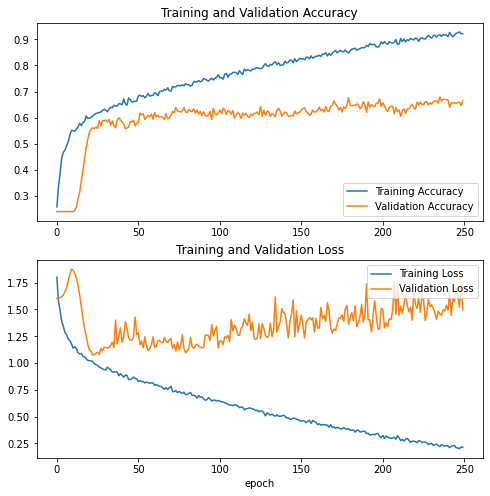

In [ ]:
### from scratch

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False, weights=None)
# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# train
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=0.00001), 
              metrics=['accuracy'])
history_fine = model.fit(train_dataset, epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### transfer learning


87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 79, 79, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 79, 79, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 79, 79, 32)   0           batch_normalization_94[0][0]     
______________________

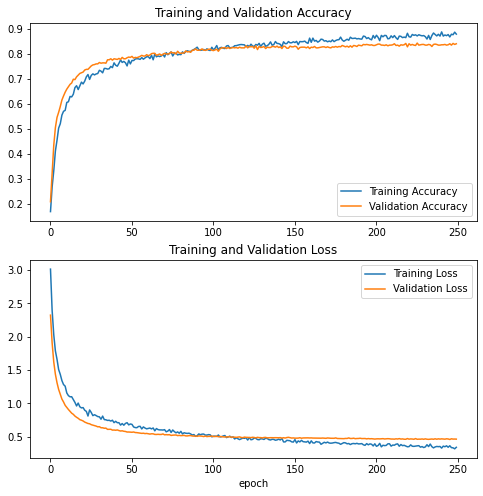

In [ ]:
# transfer learning

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# freeze the base model
base_model.trainable = False

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### fine tuning


96
98
Epoch 1/250
23/23 [==============================] - 12s 304ms/step - loss: 1.8291 - accuracy: 0.2822 - val_loss: 1.7629 - val_accuracy: 0.3556
Epoch 2/250
23/23 [==============================] - 6s 259ms/step - loss: 1.3988 - accuracy: 0.4103 - val_loss: 1.2791 - val_accuracy: 0.5640
Epoch 3/250
23/23 [==============================] - 6s 263ms/step - loss: 1.1600 - accuracy: 0.5573 - val_loss: 1.0265 - val_accuracy: 0.6540
Epoch 4/250
23/23 [==============================] - 6s 266ms/step - loss: 0.9976 - accuracy: 0.6205 - val_loss: 0.8745 - val_accuracy: 0.7016
Epoch 5/250
23/23 [==============================] - 6s 267ms/step - loss: 0.8851 - accuracy: 0.6739 - val_loss: 0.7971 - val_accuracy: 0.7289
Epoch 6/250
23/23 [==============================] - 6s 265ms/step - loss: 0.8213 - accuracy: 0.6990 - val_loss: 0.7252 - val_accuracy: 0.7561
Epoch 7/250
23/23 [==============================] - 6s 263ms/step - loss: 0.7419 - accuracy: 0.7230 - val_loss: 0.6748 - val_accuracy:

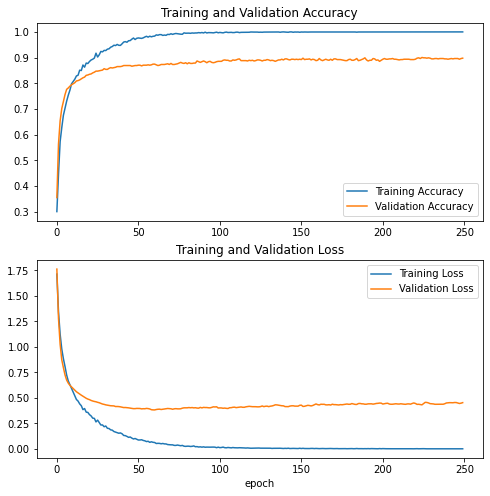

In [ ]:
# fine tuning

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
#base_model.summary()

# Freeze some first the layers
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

print(len(base_model.trainable_variables))

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)


print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### flatten

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 79, 79, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 79, 79, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 79, 79, 32)   0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

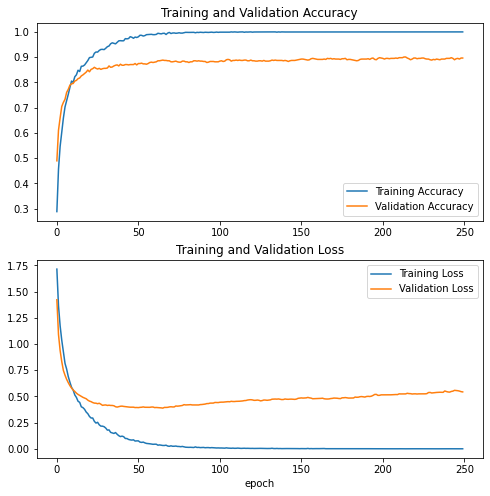

In [ ]:
# flatten

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### gmp


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 79, 79, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 79, 79, 32)   96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 79, 79, 32)   0           batch_normalization_376[0][0]    
_______________________________________________________________________________________

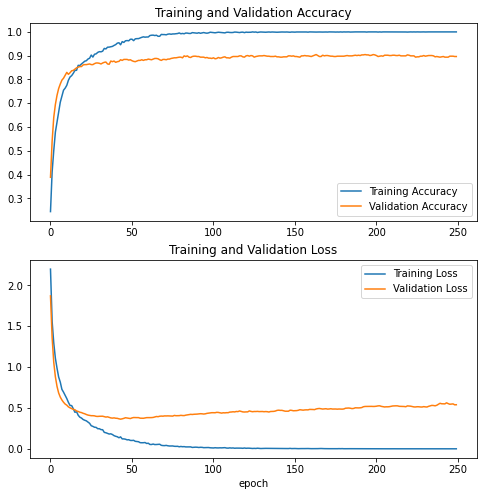

In [ ]:
# gmp

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
global_max = tf.keras.layers.GlobalMaxPool2D()

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = global_max(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### gap


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 79, 79, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 79, 79, 32)   96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 79, 79, 32)   0           batch_normalization_470[0][0]    
_______________________________________________________________________________________

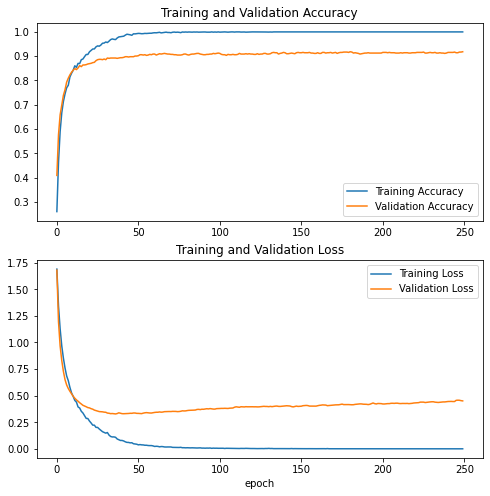

In [ ]:
# gap

# Create the base model 
base_model = tf.keras.applications.InceptionV3(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
global_average = tf.keras.layers.GlobalAveragePooling2D()

# final layer
prediction_layer = tf.keras.layers.Dense(5)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = global_average(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

print(len(base_model.trainable_variables))
print(len(model.trainable_variables))

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=250,
                         validation_data=validation_dataset)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Compare Result


| a |Without Dropout| Dropout  0.2  |
| ---- | ---- | ----|
|**InceptionV3 train from sratch**| train:0.95 val:0.64 |  train:0.92 val 0.66|
|**InceptionV3 transfer learning**| train:0.91 val:0.84| train:0.88 val:0.84|
|**InceptionV3 Finetune at 150th layer**| train:1.00 val:0.90| train:1.00 val:0.90 |
|**InceptionV3 initial trained weight with flatten**| train:1.00 val:0.90 | train:1.00 val:0.90|
|**InceptionV3 initial trained weight with gmp**| train:1.00 val:0.90| train:1.00 val:0.90|
|**InceptionV3 initial trained weight with gap**| train:1.00 **val:0.91**| train:1.00 **val:0.92**|


=> Từ kết quả trên có thể thây được đối với tập data này thì cách train khởi tạo weight đã train trước cho một tập data lớn trước đó và thay thế flatten bằng global average pooling sẽ cho kết quả validation khá tốt dù có sử dụng dropout (20%) hay không. Xét về khía cạnh sử dụng dropout nhìn chung giúp add thêm nhiễu để tăng validation thêm một chút (0.91 và khi sử dụng dropiut là 0.92).

=> Có thể kết luận rằng việc sử dụng SOTA architecture và khởi tạo các weights theo các tham số đã được train cho 1 tập data lớn khác, rồi train lại từ đầu đem lại hiểu quả khá tốt về tính tổng quát của model.